In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data introspection

In [3]:
## Read the csv file
df=pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#Get the shape of the dataset
df.shape

(9240, 37)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Get info regarding the numerical variables
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# 2.Data cleaning - handling null values 

In [7]:
# Replace 'select' values with nan values
# 'select' refers that no option is selected by customer through website  . So it reamins in its default value 
df=df.replace('Select',np.nan)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No             NaN     NaN   
1                        No             NaN     NaN   
2                        No  Potential Lead  Mumbai   
3                        No             NaN  Mumbai   
4                        No             NaN  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [8]:
#number of null value are checked 
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
## Calculate the null values percentage
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
##Droping the values having more than 70% values
null_values=round(100*(df.isnull().sum()/len(df.index)),2)
missing_features=null_values[null_values>70].index
df.drop(missing_features,axis=1,inplace=True)

In [11]:
df.shape

(9240, 35)

In [12]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [13]:
## In lead quality ,nan values can bre replaced with not sure .
df['Lead Quality']=df['Lead Quality'].replace(np.nan,'Not Sure')

In [14]:
df['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [15]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [16]:
# null values are replaced with values that occur often
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

In [17]:
df['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [18]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
#null values are replaced by values that is most frequent 
df['City']=df['City'].replace(np.nan,'Mumbai')

In [20]:
df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Ghana                      2
Uganda                     2
Italy                      2
Netherlands                2
Philippines                2
Belgium                    2
Indonesia                  1
Liberia                    1
Denmark                    1
Switzerland                1
Kenya                      1
Tanzania                   1
Vietnam       

In [22]:
#most of customers are from India . So null values are replaced by "India"
df['Country']=df['Country'].replace(np.nan,'India')

In [23]:
df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Ghana                      2
Uganda                     2
Italy                      2
Netherlands                2
Philippines                2
Belgium                    2
Indonesia                  1
Liberia                    1
Denmark                    1
Switzerland                1
Kenya                      1
Tanzania                   1
Vietnam       

In [24]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [25]:
#there seems to be a error in 'google'. So it is replaced with 'Google'
df['Lead Source']=df['Lead Source'].replace('google','Google')
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [26]:
round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [27]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [28]:
#null values in specialization are handled by naming them others 
df['Specialization']=df['Specialization'].replace(np.nan,'Others')

In [29]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#null values in current occupation are handled by naming them 'others'
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Other')

In [31]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
#null values are replaced by 'Better Career Prospects'
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [33]:
# the belows columns are dropped , as no useful information can be extarcted from those :
#'Asymmetrique Activity Index'
#'Asymmetrique Profile Index'
#'Asymmetrique Activity Score'
#'Asymmetrique Profile Score'

df.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
df.columns
                     


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
#the null values in other columns are very less. So those rows are dropped 
df.dropna(inplace=True)

In [35]:
df.isnull().sum()


#**************************************************************************************
#      all Null values are handled                                                    *
#**************************************************************************************

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

# 3. Univariate analysis with the target variable



# Categorical variables considered :
Lead Source 

Lead Origin  

Lead quality 

What is your current occupation 

Tags 

In [36]:
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
blog                    1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

In [37]:
#All the other small values are replaced by others in order to have better understanding  
df['Lead Source']=df['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','Pay per Click Ads','testone','WeLearn','youtubechannel','welearnblog_Home','NC_EDM','blog'],'Others')

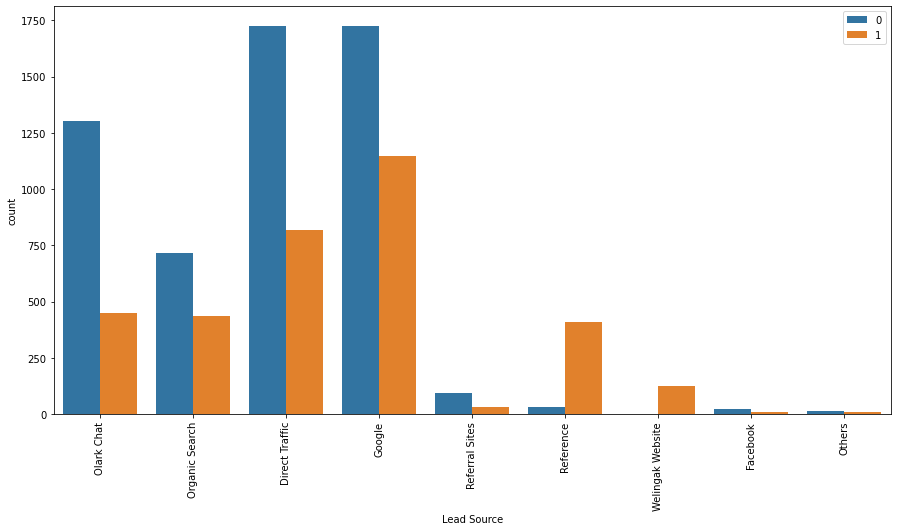

In [38]:
fig, ax= plt.subplots(figsize = (15,7.5))
sns.countplot(x='Lead Source', hue='Converted',data=df)
plt.xticks(rotation = 90)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
#1.Most of vistors come though direct Traffic , Google search with almost same conversion rates 
#2.However, conversion rated are higher when students are referred 

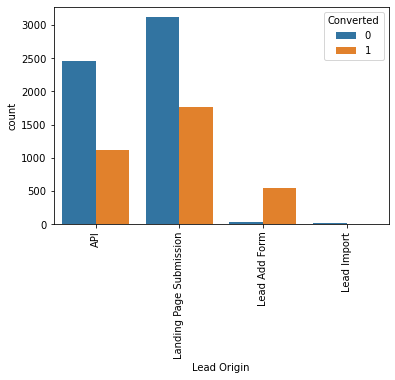

In [39]:
sns.countplot(x='Lead Origin', hue='Converted',data=df)
plt.xticks(rotation = 90)
plt.show()
#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
#1.most of customers who entered the website through lead forms have higher conversion rates .
#2.This could be because of the fact Google and Facebook's personalized advertisement clustering is helpful for reaching conversion rates 
# 

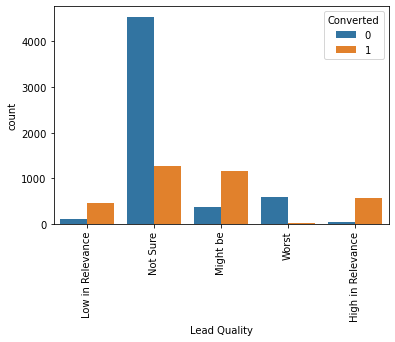

In [40]:
sns.countplot(x='Lead Quality', hue='Converted',data=df)
plt.xticks(rotation = 90)
plt.show()

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 
# 1. People who are highly relevant , have greater converison rates.However, this pool of population is very low 
# 2. People who are not sure  have less conversion rates 

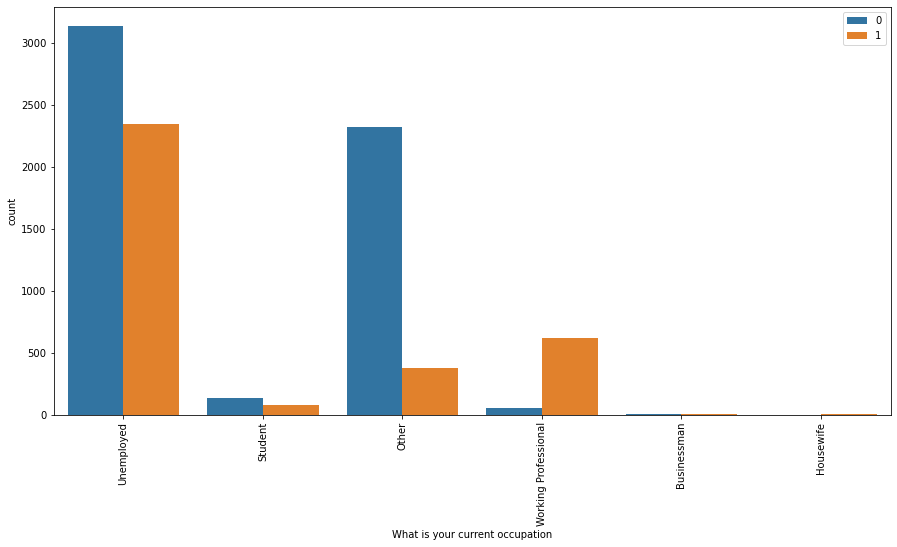

In [41]:
fig, ax= plt.subplots(figsize = (15,7.5))
sns.countplot(x='What is your current occupation', hue='Converted',data=df)
plt.xticks(rotation = 90)
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
#1. Working professionals respond positively to the online course 
#2. unemployed people form a major pool . And , the conversion rate is better than the average conversion rate 

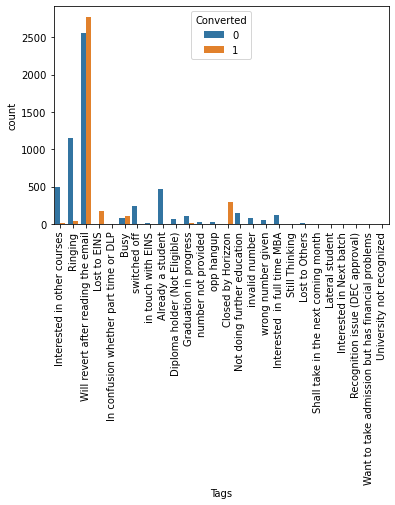

In [42]:
sns.countplot(x='Tags', hue='Converted',data=df)
plt.xticks(rotation = 90)
plt.show()

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 1. No meaningful information can be extracted by considering the 'Tags' column 
# 2. this column will be dropped 

# Handling boxplots for Numerical variables 
Total Time Spent on Website  

TotalVisits  

Page Views Per Visit  

In [43]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596406.000000     0.000000     1.000000                    11.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

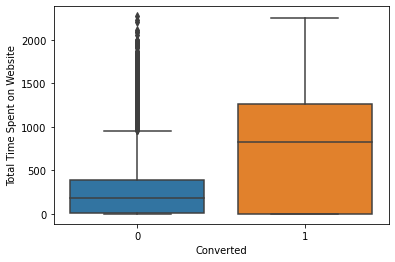

In [44]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=df)

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
#1. People who spend more time on website are more likely to convert 


In [45]:
#quantiles ranges for Total Time Spent on Website are grouped by its Converted variables 

df.groupby('Converted')['Total Time Spent on Website'].describe(percentiles=[0,0.25,0.5,0.75,0.95,0.99])

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 1. the quantiles ranges show a steady gradual increase 


count        mean         std  min   0%   25%    50%     75%  \
Converted                                                                  
0          5639.0  330.007803  432.073655  0.0  0.0  16.0  178.0   393.0   
1          3435.0  733.859389  614.507429  0.0  0.0   0.0  829.0  1266.0   

              95%      99%     max  
Converted                           
0          1376.1  1727.34  2272.0  
1          1668.3  1882.00  2253.0

In [46]:
df.groupby('Converted')['TotalVisits'].describe(percentiles=[0,0.25,0.5,0.75,0.95,0.99])

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 1. the quantiles ranges show a rapid  increase  over 95 percentile

count      mean       std  min   0%  25%  50%  75%   95%   99%  \
Converted                                                                    
0          5639.0  3.331442  4.360151  0.0  0.0  1.0  3.0  4.0   9.0  17.0   
1          3435.0  3.660553  5.576288  0.0  0.0  0.0  3.0  5.0  10.0  18.0   

             max  
Converted         
0          141.0  
1          251.0

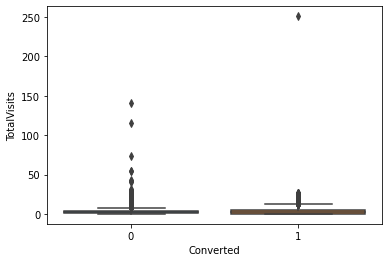

In [47]:
sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.show()

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
#1. outlier treatment needs to done 


In [48]:
#outlier treatment 

percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

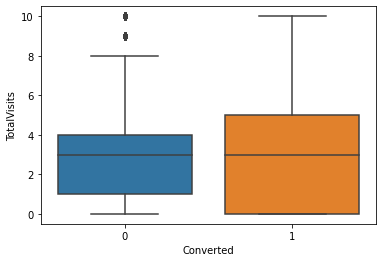

In [49]:
sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.show()

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 1. More people who have converted visit the site more often 

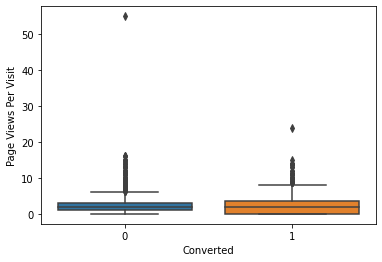

In [50]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=df)

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 1.Page Views Per Visit field needs outlier treatment , extreme percentiles need to be treated 

In [51]:
df.groupby('Converted')['Page Views Per Visit'].describe(percentiles=[0,0.25,0.5,0.75,0.95,0.99])

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 1. the quantiles ranges show a rapid  increase  over 99 percentile

count      mean      std  min   0%  25%  50%  75%  95%  99%   max
Converted                                                                    
0          5639.0  2.369713  2.17495  0.0  0.0  1.0  2.0  3.0  6.0  9.0  55.0
1          3435.0  2.370870  2.13787  0.0  0.0  0.0  2.0  3.5  6.0  9.0  24.0

In [52]:
#outlier treatment 

percentiles = df['Page Views Per Visit'].quantile([0.05,0.99]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]




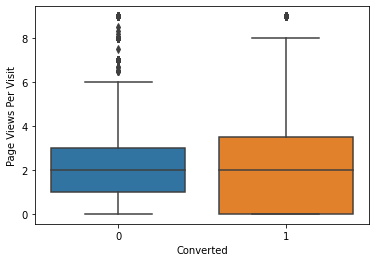

In [53]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=df)

#******************************************************************************************************************************#
#                                               INFERENCE:                                                                    *#
#******************************************************************************************************************************#
# 1. More people who have converted  read more content from website per visit 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [55]:
## Drop the columns
leads = df.drop(['Prospect ID', 'Tags', 'Last Activity','Last Notable Activity', 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [56]:
leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit           Specialization  \
0                   0.0                   Others   
1                   2.5                   Others   
2                   2.0  Business Administration   
3                   1.0    Media and Advertising   
4                   1.0                   Others   

  What is your current occupation      Lead Quality  
0                      Unemployed  Low in Relevance  
1                      Unemployed          Not Sure  
2                         Student          Might be  
3                      Unemployed          Not Sure  
4                      Unemployed          Might be

In [57]:
leads.shape

(9074, 12)

# DATA PREPARATION

In [58]:
leads["Do Not Email"] = leads["Do Not Email"].str.replace('No', '0')
leads["Do Not Email"] = leads["Do Not Email"].str.replace('Yes', '1')
leads["Do Not Call"] = leads["Do Not Call"].str.replace('Yes', '1')
leads["Do Not Call"] = leads["Do Not Call"].str.replace('No', '0')
leads["Do Not Email"] = leads["Do Not Email"].astype(int)
leads["Do Not Call"] = leads["Do Not Call"].astype(int)
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit           Specialization  \
0                   0.0                   Others   
1                   2.5                   Others   
2                   2.0  Business Administration   
3                   1.0    Media and Advertising   
4                   1.0                   Others   

  What is your current occupation      Lead Quality  
0                      Unemployed  Low in Relevance  
1                      Unemployed          Not Sure  
2                         Student          Might be  
3                      Unemployed          Not Sure  
4                      Unemployed          Might be

In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   int64  
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int32  
 4   Do Not Call                      9074 non-null   int32  
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
dtypes: float64(2), int32

In [60]:
#dummy varible creation :
#Lead Origin
#Lead Source
#Specialization
#What is your current occupation
#Tags
#Lead Quality
dummies = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Lead Quality', 'Specialization', 'What is your current occupation']], drop_first=True)
leads = pd.concat([leads, dummies], axis=1)
leads.shape





(9074, 50)

In [61]:
leads = leads.drop(['Lead Origin', 'Lead Source','Lead Quality', 'Specialization', 'What is your current occupation'], axis=1)
leads.shape


(9074, 45)

# Test train split:


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  ...  Specialization_Retail Management  \
0                   0  ...                                 0   
1                   0  ...                                 0   
2                   0  ...                                 0   
3                   0  ...                                 0   
4                   1  ...                                 0   

   Specialization_Rural and Agribusiness  Specialization_Services Excellence  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   Specialization_Supply Chain Management  Specialization_Travel and Tourism  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  
0                                                  0     
1                                                  0     
2                                                  

In [64]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.177298                                    1   
1012             -0.177298                                    1   
9226             -1.183128                                    0   
4750             -0.177298                                    1   
7987              0.074159                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3009                     0                   0  ...   
1012                     0                   0  ...   
9226                     0                   0  ...   
4750                     0                   0  ...   
7987                     0                   0  ...   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
3009                                 0                                      0   
1012                                 0                                      0   
9226                                 0                                      0   
4750                                 0                                      0   
7987                                 0                                      0   

      Specialization_Services Excellence  \
3009                                   0   
1012                                   0   
9226                                   0   
4750                                   0   
7987                                   0   

      Specialization_Supply Chain Management  \
3009                                       0   
1012                                       0   
9226                                       0   
4750                                       0   
7987                                       0   

      Specialization_Travel and Tourism  \
3009                                  0   
1012                                  0   
9226                                  0   
4750                                  0   
7987                                  0   

      What is your current occupation_Housewife  \
3009                                          0   
1012                                          0   
9226                                          0   
4750                                          0   
7987                                          0   

      What is your current occupation_Other  \
3009                                      1   
1012                                      0   
9226                                      0   
4750                                      1   
7987                                      0   

      What is your current occupation_Student  \
3009                                        0   
1012                                        0   
9226                                        0   
4750                                        0   
7987                                        0   

      What is your current occupation_Unemployed  \
3009                                           0   
1012                                           0   
9226                                           1   
4750                                           0   
798

# Model building 

In [68]:
import statsmodels.api as sm

In [69]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2309.7
Date:                Mon, 12 Apr 2021   Deviance:                       4619.4
Time:                        00:25:42   Pearson chi2:                 6.00e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.6865      1.228      3.002      0.003       1.279       6.094
Do Not Email                                            -1.2216      0.185     -6.595      0.000      -1.585      -0.859
Do Not Call                                             20.5765   3.33e+04      0.001      1.000   -6.53e+04    6.54e+04
TotalVisits                                              0.2216      0.059      3.763      0.000       0.106       0.337
Total Time Spent on Website                              1.1227      0.044     25.284      0.000       1.036       1.210
Page Views Per Visit                                    -0.1971      0.065     -3.046      0.002      -0.324      -0.070
Lead Origin_Landing Page Submission                     -0.4954      0.150     -3.308      0.001      -0.789      -0.202
Lead Origin_Lead Add Form                                0.3844      1.120      0.343      0.732      -1.812       2.580
Lead Origin_Lead Import                                 23.1867   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -22.6238   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.2277      0.105      2.170      0.030       0.022       0.433
Lead Source_Olark Chat                                   1.2751      0.165      7.720      0.000       0.951       1.599
Lead Source_Organic Search                               0.0646      0.141      0.457      0.648      -0.212       0.341
Lead Source_Others                                       1.1332      0.713      1.590      0.112      -0.264       2.530
Lead Source_Reference                                    2.4283      1.148      2.116      0.034       0.179       4.678
Lead Source_Referral Sites                              -0.7072      0.391     -1.809      0.070      -1.473       0.059
Lead Source_Welingak Website                             5.9669      1.334      4.472      0.000       3.352       8.582
Lead Quality_Low in Relevance                           -1.7464      0.283     -6.169      0.000      -2.301      -1.192
Lead Quality_Might be                                   -1.8833      0.253     -7.448      0.000      -2.379      -1.388
Lead Quality_Not Sure                                   -3.7110      0.247    -15.014      0.000      -4.195      -3.227
Lead Quality_Worst                                      -6.6255      0.446    -14.859      0.000      -7.499      -5.752
Specialization_Business Administration                  -0.2586      0.276     -0.938      0.348      -0.799       0.282
Specialization_E-Business                                0

In [70]:
#feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [71]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False,  True])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Quality_Low in Relevance', True, 1),
 ('Lead Quality_Might be', True, 1),
 ('Lead Quality_Not Sure', True, 1),
 ('Lead Quality_Worst', True, 1),
 ('Specialization_Business Administration', False, 23),
 ('Specialization_E-Business', False, 13),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 25),
 ('Specialization_Healthcare Management',

In [74]:
col = X_train.columns[rfe.support_]

In [75]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your curre

In [76]:
# accessing stats model 
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2333.3
Date:                Mon, 12 Apr 2021   Deviance:                       4666.6
Time:                        00:25:47   Pearson chi2:                 6.04e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5918      0.247     10.476      0.000       2.107       3.077
Do Not Email                                            -1.2727      0.184     -6.929      0.000      -1.633      -0.913
Total Time Spent on Website                              1.1245      0.044     25.755      0.000       1.039       1.210
Lead Origin_Landing Page Submission                     -0.3621      0.095     -3.827      0.000      -0.548      -0.177
Lead Origin_Lead Add Form                                2.5732      0.253     10.180      0.000       2.078       3.069
Lead Source_Olark Chat                                   1.0433      0.125      8.328      0.000       0.798       1.289
Lead Source_Referral Sites                              -0.9081      0.376     -2.415      0.016      -1.645      -0.171
Lead Source_Welingak Website                             3.5159      0.757      4.644      0.000       2.032       5.000
Lead Quality_Low in Relevance                           -1.7238      0.279     -6.177      0.000      -2.271      -1.177
Lead Quality_Might be                                   -1.9240      0.249     -7.714      0.000      -2.413      -1.435
Lead Quality_Not Sure                                   -3.7710      0.243    -15.518      0.000      -4.247      -3.295
Lead Quality_Worst                                      -6.6117      0.439    -15.048      0.000      -7.473      -5.751
Specialization_Services Excellence                      -0.8245      0.743     -1.109      0.267      -2.281       0.632
What is your current occupation_Housewife               21.1973   1.62e+04      0.001      0.999   -3.17e+04    3.17e+04
What is your current occupation_Other                   -0.7234      0.092     -7.825      0.000      -0.905      -0.542
What is your current occupation_Working Professional     1.7768      0.204      8.718      0.000       1.377       2.176
========================================================================================================================
"""

In [77]:
col = col.drop(["What is your current occupation_Housewife"])

In [78]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Specialization_Services Excellence',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2334.9
Date:                Mon, 12 Apr 2021   Deviance:                       4669.7
Time:                        00:25:47   Pearson chi2:                 6.05e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5899      0.247     10.469      0.000       2.105       3.075
Do Not Email                                            -1.2749      0.184     -6.938      0.000      -1.635      -0.915
Total Time Spent on Website                              1.1236      0.044     25.753      0.000       1.038       1.209
Lead Origin_Landing Page Submission                     -0.3601      0.095     -3.806      0.000      -0.545      -0.175
Lead Origin_Lead Add Form                                2.5835      0.252     10.239      0.000       2.089       3.078
Lead Source_Olark Chat                                   1.0424      0.125      8.320      0.000       0.797       1.288
Lead Source_Referral Sites                              -0.9112      0.376     -2.423      0.015      -1.648      -0.174
Lead Source_Welingak Website                             3.5060      0.757      4.632      0.000       2.022       4.990
Lead Quality_Low in Relevance                           -1.6987      0.279     -6.092      0.000      -2.245      -1.152
Lead Quality_Might be                                   -1.9226      0.249     -7.708      0.000      -2.411      -1.434
Lead Quality_Not Sure                                   -3.7698      0.243    -15.513      0.000      -4.246      -3.294
Lead Quality_Worst                                      -6.6100      0.439    -15.045      0.000      -7.471      -5.749
Specialization_Services Excellence                      -0.8237      0.743     -1.109      0.268      -2.280       0.633
What is your current occupation_Other                   -0.7232      0.092     -7.823      0.000      -0.904      -0.542
What is your current occupation_Working Professional     1.7716      0.204      8.689      0.000       1.372       2.171
========================================================================================================================
"""

In [80]:
col = col.drop(["Specialization_Services Excellence"])
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2335.5
Date:                Mon, 12 Apr 2021   Deviance:                       4670.9
Time:                        00:25:47   Pearson chi2:                 6.05e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5862      0.247     10.454      0.000       2.101       3.071
Do Not Email                                            -1.2819      0.184     -6.973      0.000      -1.642      -0.922
Total Time Spent on Website                              1.1231      0.044     25.750      0.000       1.038       1.209
Lead Origin_Landing Page Submission                     -0.3615      0.095     -3.823      0.000      -0.547      -0.176
Lead Origin_Lead Add Form                                2.5846      0.252     10.243      0.000       2.090       3.079
Lead Source_Olark Chat                                   1.0422      0.125      8.320      0.000       0.797       1.288
Lead Source_Referral Sites                              -0.9106      0.376     -2.424      0.015      -1.647      -0.174
Lead Source_Welingak Website                             3.5063      0.757      4.632      0.000       2.023       4.990
Lead Quality_Low in Relevance                           -1.6932      0.279     -6.073      0.000      -2.240      -1.147
Lead Quality_Might be                                   -1.9222      0.249     -7.705      0.000      -2.411      -1.433
Lead Quality_Not Sure                                   -3.7662      0.243    -15.498      0.000      -4.243      -3.290
Lead Quality_Worst                                      -6.6056      0.439    -15.037      0.000      -7.467      -5.745
What is your current occupation_Other                   -0.7229      0.092     -7.822      0.000      -0.904      -0.542
What is your current occupation_Working Professional     1.7647      0.204      8.658      0.000       1.365       2.164
========================================================================================================================
"""

# Predicting the values  using the Model

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.079846
1012    0.159047
9226    0.243075
4750    0.396802
7987    0.673593
1281    0.791193
2880    0.037173
4971    0.722767
7536    0.995046
1248    0.633022
dtype: float64

In [82]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07984568, 0.1590469 , 0.24307481, 0.3968016 , 0.67359301,
       0.79119306, 0.03717312, 0.72276659, 0.99504612, 0.63302193])

In [83]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number
0          0        0.079846         3009
1          0        0.159047         1012
2          0        0.243075         9226
3          1        0.396802         4750
4          1        0.673593         7987

The final matrix for train data set with Lead Number, Converted_Prob, Converted (odds/even) is y_train_pred_final

Initially,  threshold probability considered as 0.5 , and the odds are predicted 

In [84]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted
0          0        0.079846         3009          0
1          0        0.159047         1012          0
2          0        0.243075         9226          0
3          1        0.396802         4750          0
4          1        0.673593         7987          1

# Data evaluation using confusion matrix 

In [85]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3509  396]
 [ 694 1752]]


In [86]:
print("Accuracy for train data set is ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy for train data set is  0.8283734844906314


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                               Lead Quality_Not Sure  3.76
2                 Lead Origin_Landing Page Submission  2.96
4                              Lead Source_Olark Chat  1.92
11              What is your current occupation_Other  1.92
8                               Lead Quality_Might be  1.79
3                           Lead Origin_Lead Add Form  1.65
6                        Lead Source_Welingak Website  1.37
12  What is your current occupation_Working Profes...  1.35
1                         Total Time Spent on Website  1.30
7                       Lead Quality_Low in Relevance  1.24
10                                 Lead Quality_Worst  1.23
0                                        Do Not Email  1.12
5                          Lead Source_Referral Sites  1.04

In [89]:
# the VIF value is well within the limits (less than 5.00)

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
print("Sensitivity for train data set is ", TP / float(TP+FN))  # sensitivity

Sensitivity for train data set is  0.7162714636140638


In [92]:
print("Specificity for train data set is ", TN / float(TN+FP))   #specificity

Specificity for train data set is  0.8985915492957747


In [93]:
# Calculate false postive rate - predicting churn when customer does not have churned
print("false postive rate for train data set is ", FP/ float(TN+FP))

false postive rate for train data set is  0.10140845070422536


In [94]:
# positive predictive value 
print("positive predictive value for train data set is ", TP / float(TP+FP))

positive predictive value for train data set is  0.8156424581005587


In [95]:
# Negative predictive value
print("Negative predictive value for train data set is ", TN / float(TN+ FN))

Negative predictive value for train data set is  0.8348798477278134


# ROC line

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.079846         3009          0    1    0    0    0    0   
1          0        0.159047         1012          0    1    1    0    0    0   
2          0        0.243075         9226          0    1    1    1    0    0   
3          1        0.396802         4750          0    1    1    1    1    0   
4          1        0.673593         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    1    1    0    0    0

In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.632341  0.974244  0.418182
0.2   0.2  0.797827  0.911284  0.726761
0.3   0.3  0.823492  0.837285  0.814853
0.4   0.4  0.826327  0.781684  0.854289
0.5   0.5  0.828373  0.716271  0.898592
0.6   0.6  0.829791  0.668438  0.930858
0.7   0.7  0.821760  0.603843  0.958259
0.8   0.8  0.806015  0.535977  0.975160
0.9   0.9  0.772634  0.426002  0.989757


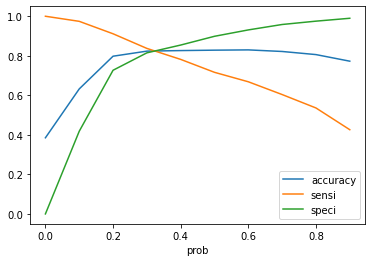

In [98]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph , it is  observed that when probability can be assumed as  0.3, as sensitivity and specificity converge at that point 

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Lead Number  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.079846         3009          0    1    0    0    0    0   
1          0        0.159047         1012          0    1    1    0    0    0   
2          0        0.243075         9226          0    1    1    1    0    0   
3          1        0.396802         4750          0    1    1    1    1    0   
4          1        0.673593         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    0    0    0    0    0                1  
4    1    1    0    0    0                1

In [100]:
### Checking the Conversion Rate on Train data set 
Conversion_Rate = (sum(y_train_pred_final['final_predicted'])/len(y_train_pred_final['final_predicted'].index))*100
Conversion_Rate

43.63092426389545

In [101]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8234923634073374

In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3182,  723],
       [ 398, 2048]], dtype=int64)

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8372853638593623

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.8148527528809218

In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1851472471190781


In [107]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7390833634067123


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8888268156424581


In [109]:
#precision and Recall
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3509,  396],
       [ 694, 1752]], dtype=int64)

In [110]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])   #precision

0.8156424581005587

In [111]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])   # recall

0.7162714636140638

In [112]:
from sklearn.metrics import precision_score, recall_score

Calculate precision and recall 

In [113]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8156424581005587

In [114]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7162714636140638

# Predictions on Test data set  

In [115]:
# making predictions on test data set 
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [116]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
3271             0                    -0.591008   
1490             0                     1.894051   
7936             0                    -0.743117   
4216             0                    -0.878732   
3830             0                    -0.578179   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Referral Sites  \
3271                       0                           0   
1490                       0                           0   
7936                       0                           0   
4216                       0                           0   
3830                       0                           0   

      Lead Source_Welingak Website  Lead Quality_Low in Relevance  \
3271                             0                              0   
1490                             0                              1   
7936                             0                              0   
4216                             0                              1   
3830                             0                              0   

      Lead Quality_Might be  Lead Quality_Not Sure  Lead Quality_Worst  \
3271                      0                      1                   0   
1490                      0                      0                   0   
7936                      0                      1                   0   
4216                      0                      0                   0   
3830                      0                      1                   0   

      What is your current occupation_Other  \
3271                                      1   
1490                                      0   
7936                                      1   
4216                                      0   
3830                                      1   

      What is your current occupation_Working Professional  
3271                                                  0     
1490                                                  1     
7936                                                  0     
4216                                                  0     
3830                                                  0

In [117]:
X_test_sm = sm.add_constant(X_test)

In [118]:
y_test_pred = res.predict(X_test_sm)

In [119]:
y_test_pred[:10]

3271    0.071310
1490    0.988150
7936    0.060793
4216    0.923486
3830    0.051474
1800    0.812402
6507    0.094238
4821    0.245137
4223    0.984989
4714    0.136147
dtype: float64

In [120]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [121]:
y_pred_1.head()

0
3271  0.071310
1490  0.988150
7936  0.060793
4216  0.923486
3830  0.051474

In [122]:
y_test_df = pd.DataFrame(y_test)

In [123]:
y_test_df['Lead Number'] = y_test_df.index

In [124]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
y_pred_final.head()

Converted  Lead Number         0
0          0         3271  0.071310
1          1         1490  0.988150
2          0         7936  0.060793
3          1         4216  0.923486
4          0         3830  0.051474

In [127]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [128]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [129]:
# Let's see the head of y_pred_final
y_pred_final.head()

Lead Number  Converted  Converted_Prob
0         3271          0        0.071310
1         1490          1        0.988150
2         7936          0        0.060793
3         4216          1        0.923486
4         3830          0        0.051474

In [130]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.30 else 0)

In [131]:
y_pred_final.head()

Lead Number  Converted  Converted_Prob  final_predicted
0         3271          0        0.071310                0
1         1490          1        0.988150                1
2         7936          0        0.060793                0
3         4216          1        0.923486                1
4         3830          0        0.051474                0

In [132]:
### Checking the Conversion Rate on Test data set 
Conversion_Rate = (sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index))*100
Conversion_Rate

40.72713918472273

In [133]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8273962541314727

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1439,  295],
       [ 175,  814]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8230535894843276

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.8298731257208766

In [138]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])   #precision

0.7339945897204689

In [139]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])   # recall

0.8230535894843276

# Conclusion :

Evaluation metrics on train data: 
    
Conversion Rate : 43.63%  
Accuracy : 82.34%  
Senstivity :83.72%        
Specificty :81.48%    
    
Evaluation metrics on  test data:    
    
Conversion Rate :40.72%  
Accuracy :82.73%  
Senstivity :82.30%  
Specificty :82.98%  